<a href="https://colab.research.google.com/github/mdmake/intro-to-dl-hse/blob/homeworks/seminar_1_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Элементарные операции с torch

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
#from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

In [ ]:
import pandas as pd

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
a = np.random.rand()

In [ ]:
a = torch.tensor([1,2,3,4,5])

In [ ]:
a = torch.rand(3,4)
b = torch.rand(3,4)
a

tensor([[0.4950, 0.7691, 0.8727, 0.8194],
        [0.9659, 0.7231, 0.5221, 0.2088],
        [0.9806, 0.9881, 0.8013, 0.7957]])

In [ ]:
torch.sin(a)

tensor([[0.4750, 0.6955, 0.7661, 0.7307],
        [0.8226, 0.6617, 0.4987, 0.2073],
        [0.8308, 0.8350, 0.7182, 0.7144]])

In [ ]:
a*b

tensor([[0.2482, 0.1268, 0.8324, 0.7852],
        [0.6460, 0.1082, 0.2789, 0.0524],
        [0.2019, 0.4535, 0.0854, 0.3210]])

In [ ]:
c = torch.randn(4, 5)

In [ ]:
a @ c

tensor([[-2.0974,  2.9604,  2.4260,  0.4819, -1.0232],
        [-1.0559,  1.2311,  1.8544,  0.1193, -0.6316],
        [-2.3161,  2.7169,  2.7182,  0.5242, -0.8745]])

In [ ]:
torch.softmax(a, dim=1).sum(dim=1)

tensor([1., 1., 1.])

In [ ]:
torch.softmax(a, dim=1)

tensor([[0.1939, 0.2550, 0.2829, 0.2682],
        [0.3454, 0.2710, 0.2216, 0.1620],
        [0.2721, 0.2742, 0.2275, 0.2262]])

In [ ]:
torch.sin(a/b)

tensor([[ 0.8344, -0.9989,  0.7925,  0.7547],
        [ 0.9920, -0.9927,  0.8292,  0.7389],
        [-0.9987,  0.8352,  0.9433,  0.9204]])

Требуем посчитать градиенты

In [ ]:
d = torch.tensor([2.], requires_grad=True)
d.grad, d

(None, tensor([2.], requires_grad=True))

In [ ]:
d

tensor([2.], requires_grad=True)

In [ ]:
d2 = d**2
d2

tensor([4.], grad_fn=<PowBackward0>)

In [ ]:
d2.backward()

In [ ]:
d.grad, d

(tensor([4.]), tensor([2.], requires_grad=True))

In [ ]:
x = torch.ones((2,3), requires_grad=True)
y = torch.rand((2,3,4), requires_grad=True)

In [ ]:
l = torch.exp(y.sum(dim=-1) + x.tanh()).sum()
l

tensor(204.0970, grad_fn=<SumBackward0>)

In [ ]:
l.backward()

In [ ]:
x.grad, y.grad

(tensor([[15.5370,  7.8953, 15.9765],
         [20.4202,  8.7715, 17.1151]]),
 tensor([[[36.9951, 36.9951, 36.9951, 36.9951],
          [18.7994, 18.7994, 18.7994, 18.7994],
          [38.0416, 38.0416, 38.0416, 38.0416]],
 
         [[48.6224, 48.6224, 48.6224, 48.6224],
          [20.8858, 20.8858, 20.8858, 20.8858],
          [40.7527, 40.7527, 40.7527, 40.7527]]]))

In [ ]:
x.grad, y.grad

(tensor([[15.5370,  7.8953, 15.9765],
         [20.4202,  8.7715, 17.1151]]),
 tensor([[[36.9951, 36.9951, 36.9951, 36.9951],
          [18.7994, 18.7994, 18.7994, 18.7994],
          [38.0416, 38.0416, 38.0416, 38.0416]],
 
         [[48.6224, 48.6224, 48.6224, 48.6224],
          [20.8858, 20.8858, 20.8858, 20.8858],
          [40.7527, 40.7527, 40.7527, 40.7527]]]))

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
x = torch.rand(10,10).to(device)

In [ ]:
x

tensor([[0.1018, 0.3443, 0.5654, 0.4113, 0.7217, 0.0558, 0.4514, 0.8476, 0.2368,
         0.2496],
        [0.8912, 0.8033, 0.4351, 0.9072, 0.1157, 0.7264, 0.5203, 0.6924, 0.8556,
         0.9340],
        [0.4371, 0.5499, 0.9623, 0.0425, 0.7618, 0.5463, 0.9393, 0.0419, 0.0767,
         0.7183],
        [0.9555, 0.6934, 0.7432, 0.2375, 0.4583, 0.3492, 0.2614, 0.2693, 0.8985,
         0.2057],
        [0.7555, 0.2774, 0.5569, 0.0102, 0.4070, 0.3171, 0.0383, 0.4550, 0.4787,
         0.9592],
        [0.8174, 0.0078, 0.7178, 0.7896, 0.9496, 0.4478, 0.8541, 0.4181, 0.2777,
         0.2165],
        [0.3177, 0.7680, 0.7244, 0.8783, 0.0869, 0.6758, 0.5840, 0.9691, 0.4627,
         0.4288],
        [0.3814, 0.9314, 0.3853, 0.9650, 0.3629, 0.3210, 0.2670, 0.0321, 0.4636,
         0.5310],
        [0.3224, 0.8444, 0.7283, 0.0669, 0.1957, 0.2027, 0.5859, 0.4947, 0.3866,
         0.4690],
        [0.3336, 0.6215, 0.8945, 0.0898, 0.3546, 0.2709, 0.3987, 0.7451, 0.1984,
         0.1969]], device='c

In [ ]:
# это не очень правильно - непонятно кудла оно отправилось - а если куды нет то все еще и упадет
y = torch.rand(10,10).cuda()
y

tensor([[0.4848, 0.8956, 0.4050, 0.5224, 0.5326, 0.2235, 0.4071, 0.1331, 0.8370,
         0.0996],
        [0.0140, 0.6447, 0.1894, 0.6853, 0.3680, 0.3586, 0.3233, 0.5027, 0.4453,
         0.6126],
        [0.0454, 0.2729, 0.1849, 0.3384, 0.9950, 0.1573, 0.9303, 0.5905, 0.7361,
         0.9077],
        [0.5231, 0.7596, 0.6539, 0.7931, 0.2494, 0.0125, 0.9811, 0.1918, 0.6273,
         0.0828],
        [0.1000, 0.1567, 0.4038, 0.8384, 0.6387, 0.5381, 0.0914, 0.2953, 0.5584,
         0.6631],
        [0.2852, 0.0970, 0.5069, 0.9506, 0.1830, 0.5666, 0.3539, 0.8149, 0.9108,
         0.1347],
        [0.8991, 0.6379, 0.7307, 0.1953, 0.6007, 0.5702, 0.0524, 0.3693, 0.9345,
         0.2810],
        [0.5931, 0.5477, 0.2934, 0.0835, 0.5980, 0.7773, 0.4879, 0.7346, 0.6266,
         0.8223],
        [0.3503, 0.2871, 0.0680, 0.4338, 0.3002, 0.0136, 0.9879, 0.3014, 0.6119,
         0.1831],
        [0.8437, 0.0761, 0.3553, 0.7859, 0.1064, 0.5057, 0.4819, 0.2075, 0.9561,
         0.4285]], device='c

In [ ]:
# сразу сформировался на gpu
z = torch.rand(10,10, device=device)

In [ ]:
x = z.cpu()

In [ ]:
a = torch.randn(10000, 10000)
a

tensor([[ 0.5074,  0.7350, -1.4739,  ..., -0.1625, -0.8189, -0.6739],
        [-1.3918,  2.2203,  0.2932,  ..., -0.9794, -2.0833,  0.1938],
        [-0.2521,  2.1877, -0.7880,  ...,  0.0200, -0.2547,  1.4090],
        ...,
        [-0.5238, -1.0332,  0.9525,  ...,  0.8310,  0.2160,  0.2999],
        [-0.3132, -1.0029,  0.4005,  ...,  1.0447, -1.8502,  0.9518],
        [ 1.1598,  2.6521, -0.3274,  ...,  0.2407,  0.1791, -0.9375]])

In [ ]:
a_python = a.tolist()

In [ ]:
%%time
sum(sum(a_python[i]) for i in range(len(a_python)))

CPU times: user 570 ms, sys: 17 µs, total: 570 ms
Wall time: 579 ms


-6559.165076652865

In [ ]:
a_numpy = a.numpy()

In [ ]:
%%time
a_numpy.sum()

CPU times: user 50 ms, sys: 2 ms, total: 52 ms
Wall time: 51.5 ms


-6559.1636

In [ ]:
%%time
a.to(device).sum()

CPU times: user 96.1 ms, sys: 3.02 ms, total: 99.1 ms
Wall time: 99.2 ms


tensor(-6559.1680, device='cuda:0')

In [ ]:
x = torch.rand(5,5,requires_grad=True)
y = torch.rand(5,5,requires_grad=False)

In [ ]:
l = (x*y).sum()
l.backward()

In [ ]:
x.grad

tensor([[0.5357, 0.5434, 0.8516, 0.1478, 0.6583],
        [0.8556, 0.4511, 0.9743, 0.4057, 0.2225],
        [0.7319, 0.8251, 0.8236, 0.2090, 0.2939],
        [0.4854, 0.2369, 0.4006, 0.2120, 0.3036],
        [0.4358, 0.4880, 0.4144, 0.9300, 0.1475]])

In [ ]:
y.grad

In [ ]:
try:
  with torch.no_grad():
    l = (x*y).sum()
    l.backward()
except Exception as e:
  print(e)

element 0 of tensors does not require grad and does not have a grad_fn


In [ ]:
# более продвинутая версия no_grad
with torch.inference_mode():
  l = (x*y).sum()
  #l.backward()

# Обучение

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm


sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
test_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [ ]:
for image, labels in train_loader:
  print(image[0], labels[0])
  print(image.shape, labels[0])

  break

print

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

<function print>

In [ ]:
len(train_set)

60000

In [ ]:
out = train_set[1357]

In [ ]:
picture, label = out
picture.shape

torch.Size([1, 28, 28])

In [ ]:
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
out[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
from torch import nn

In [ ]:
def train(model, optimizer, criterion, sheduler=None):
  train_losses, train_accuracies = [], []
  test_losses, test_accuracies = [], []

  for epoch in range(1, NUM_EPOCH+1):

    # train
    model.train()
    train_loss, train_accuracy = 0, 0
    for images, labels in tqdm(train_loader, desc="training"):
      images = images.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()
      # logits: batch_size x num_classes
      logits = model(torch.flatten(images, start_dim=1))
      loss = criterion(logits, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item() * images.shape[0]
      train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    if sheduler is not None:
      sheduler.step()


    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    train_losses += [train_loss, ]
    train_accuracies += [train_accuracy, ]



    # test
    model.eval()
    test_loss, test_accuracy = 0, 0
    for images, labels in tqdm(test_loader, desc='validation'):
      images = images.to(device)
      labels = labels.to(device)

      with torch.no_grad():
        # logits: batch_size x num_classes
        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)


      test_loss += loss.item() * images.shape[0]
      test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    test_losses += [test_loss, ]
    test_accuracies += [test_accuracy, ]



    plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)


In [ ]:
class MLP(nn.Module):
  def __init__(self, in_features, num_classes, hidden_size):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_size),
        nn.ReLU(),
        nn.Linear(in_features=hidden_size, out_features=hidden_size),
        nn.LeakyReLU(0.1),
        nn.Linear(in_features=hidden_size, out_features=num_classes)
        #nn.LogSoftmax(),
    )

  def forward(self, x):
    return self.model(x)

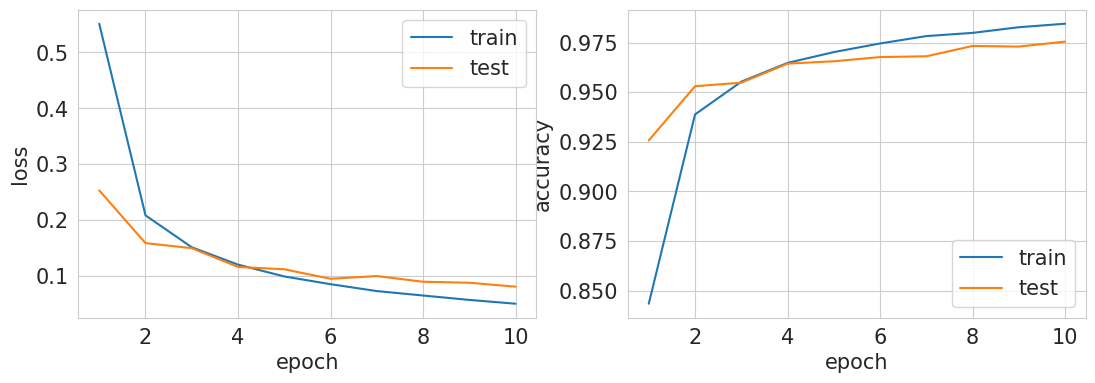

In [ ]:
IMG_SIZE = 28
NUM_CLASSES = len(train_set.classes)
HIDDEN_SIZE = 64
NUM_EPOCH = 10

model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion)

In [ ]:
# model
# model.model[0]
# model.model[0].weight, model.model[0].weight.shape, model.model[0].bias.shape,
# model.model[0].bias


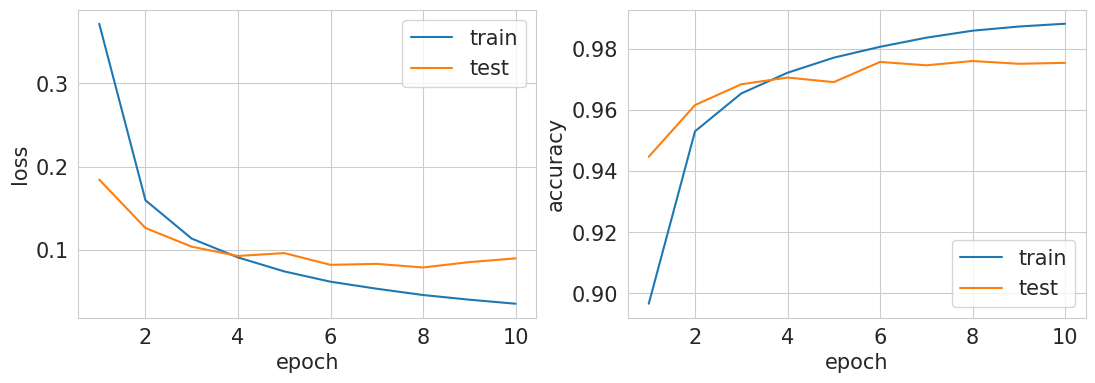

In [ ]:
IMG_SIZE = 28
NUM_CLASSES = len(train_set.classes)
HIDDEN_SIZE = 64
NUM_EPOCH = 10

model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion)

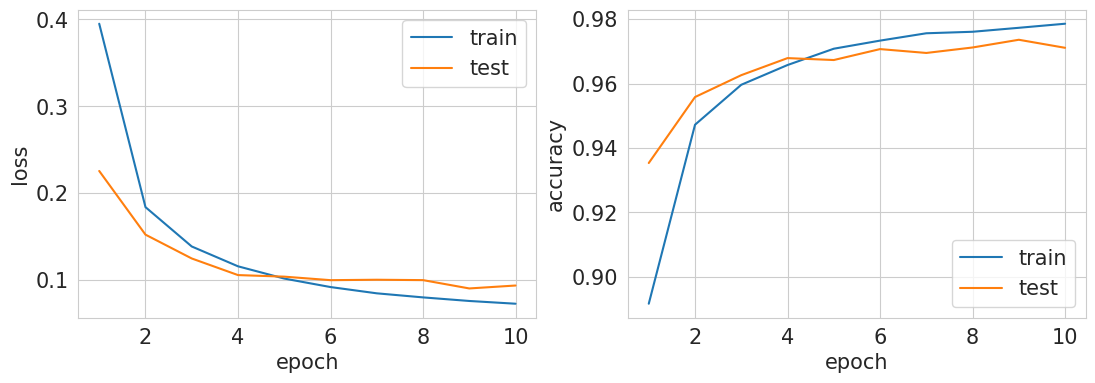

In [ ]:
model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion)

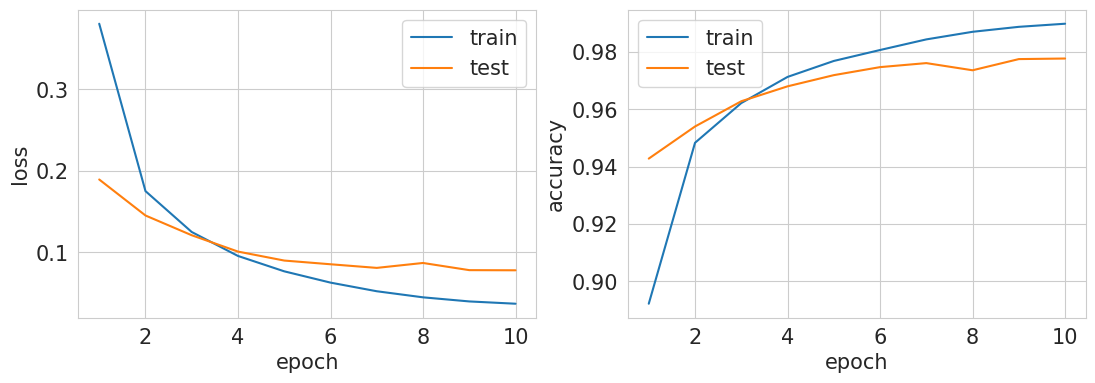

In [ ]:
model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
sheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion, sheduler)

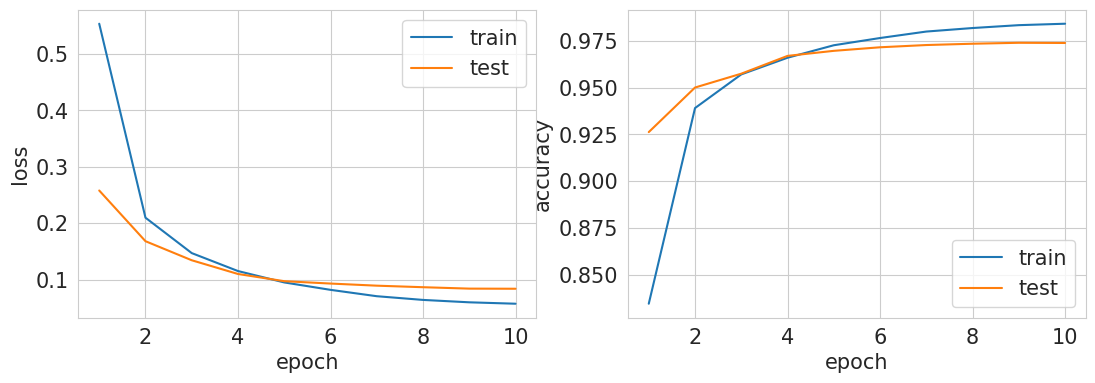

In [ ]:
model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
sheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion, sheduler)

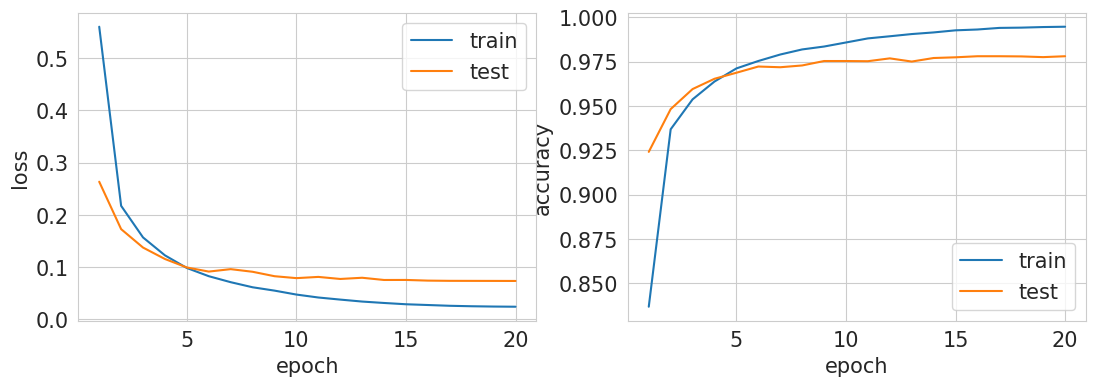

In [ ]:
IMG_SIZE = 28
NUM_CLASSES = len(train_set.classes)
HIDDEN_SIZE = 64
NUM_EPOCH = 20

model = MLP(in_features=IMG_SIZE**2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
sheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)
criterion = nn.CrossEntropyLoss()
train(model, optimizer, criterion, sheduler)

# Эксперименты всякие

In [ ]:
x = torch.ones(5,10)
x

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
dropout = nn.Dropout(p=0.25)
dropout.train()

Dropout(p=0.25, inplace=False)

In [ ]:
dropout(x)

tensor([[1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333,
         1.3333],
        [1.3333, 0.0000, 1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 1.3333, 1.3333,
         1.3333],
        [1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 0.0000, 1.3333,
         1.3333],
        [1.3333, 0.0000, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 0.0000,
         0.0000],
        [1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333, 1.3333,
         0.0000]])

In [ ]:
dropout.eval()
dropout(x)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
nn.BatchNorm1d?

In [ ]:
batch_norm = nn.BatchNorm1d(num_features=10, affine=False)
batch_norm.train()

BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)

In [ ]:
x = 1 + 2*torch.randn(54,10)

In [ ]:
x.mean(dim=0), x.var(dim=0)

(tensor([1.3977, 0.6626, 0.9628, 1.1586, 0.4820, 0.9204, 0.8219, 1.1932, 1.0670,
         1.0586]),
 tensor([4.0568, 4.2643, 3.3889, 3.5266, 3.4259, 6.3577, 3.4460, 3.9943, 4.2769,
         4.0098]))

In [ ]:
y = batch_norm(x)

In [ ]:
y.mean(dim=0), y.var(dim=0)

(tensor([ 6.4020e-08, -1.3245e-08, -3.0906e-08, -3.5321e-08,  0.0000e+00,
         -1.3245e-08,  8.8303e-09, -3.2562e-08, -1.7661e-08, -1.5453e-08]),
 tensor([1.0189, 1.0189, 1.0189, 1.0189, 1.0189, 1.0189, 1.0189, 1.0189, 1.0189,
         1.0189]))

In [ ]:
batch_norm.running_mean

tensor([0.5026, 0.7590, 0.3498, 0.6003, 0.5755, 0.3627, 0.5120, 0.6203, 0.5377,
        0.6696])

In [ ]:
batch_norm.running_var

tensor([3.1608, 3.4733, 3.4947, 3.2627, 2.8467, 2.6457, 2.4246, 2.3905, 2.3045,
        2.2948])